Q4: Local authorities in many countries need to predict the market prices of houses to determine property taxes. They can do this by relating the known prices of houses that have been sold to features such as the number of bedrooms/bathrooms and the
neighborhood in which the house is located.We use the housing prices data in Iowa. Sale.Price is the target variable and all other variables serve as features. The processed training data and test data are attached with this assignment. Calculate the test prediction errors for each fitting required below. Set seed as your matric number before you run program for each part.

In [1]:
import pandas as pd
house_training = pd.read_csv("Houseprice.train.csv")
print(house_training.shape)

(2035, 48)


In [2]:
house_test = pd.read_csv("Houseprice.test.csv")
print(house_test.shape)

(873, 48)


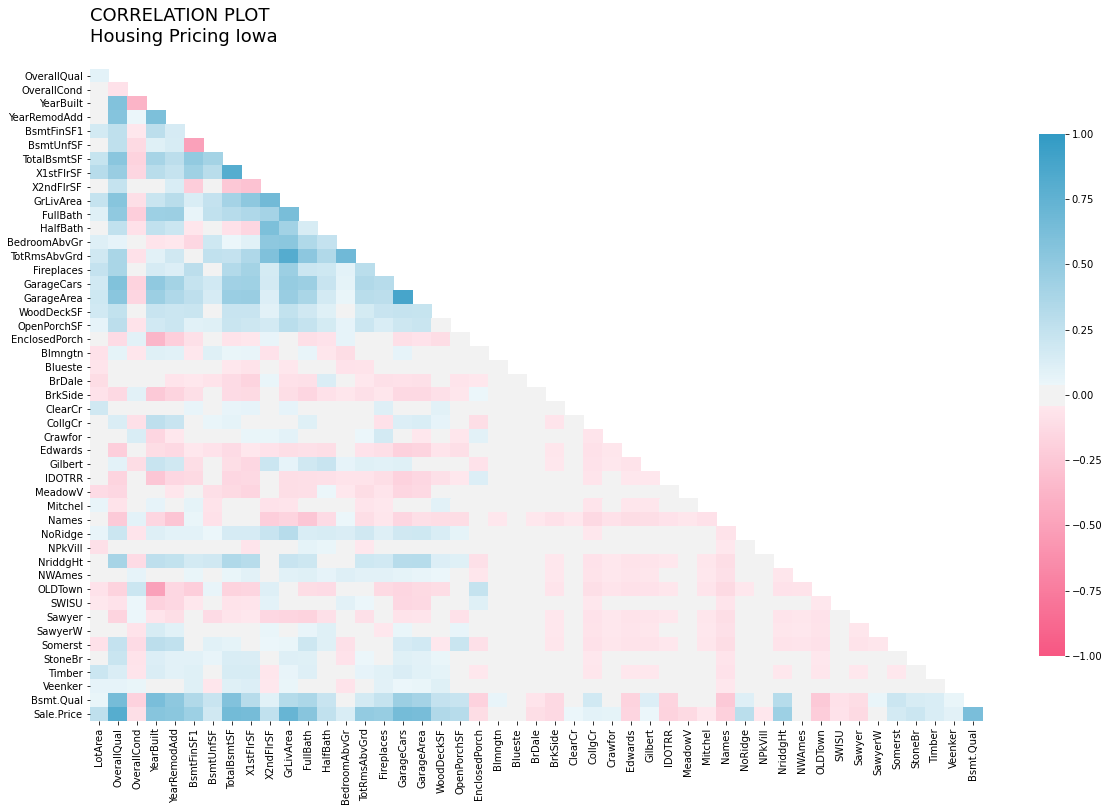

In [3]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#calculating of correlation
df_corr = house_training.corr()
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))


# ploting of correlation matrix
fig, ax = plt.subplots(figsize=(20, 12))


# adjust mask and df
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()


# color map
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)


# plot heatmap
sns.heatmap(corr, mask=mask, fmt=".2f", cmap=cmap, vmin=-1, vmax=1, cbar_kws={"shrink": .8})


# yticks
plt.yticks(rotation=0)


# title
title = 'CORRELATION PLOT\nHousing Pricing Iowa\n'
plt.title(title, loc='left', fontsize=18)


plt.show()

From the correlation martix,  we can observed that those variable which are pale color are not correlated. Variables: Blmngtn, Blueste, NWAmes and Sawyer have very low correlation with Sale Price

(a) Fit a linear regression.

In [4]:
seed = 2002094
from sklearn.metrics import mean_squared_error


# splitting of data into X and y
house_training_X = house_training.iloc[:,:-1]
house_training_y = house_training.iloc[:,-1]

house_test_X = house_test.iloc[:,:-1]
house_test_y = house_test.iloc[:,-1]


# scaling of data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(house_training_X)

house_training_X_scaled = scaler.transform(house_training_X)
house_training_X_scaled = pd.DataFrame(house_training_X_scaled, columns=house_training_X.columns)

house_test_X_scaled = scaler.transform(house_test_X)
house_test_X_scaled = pd.DataFrame(house_test_X_scaled, columns=house_test_X.columns)


# Linear regression
from sklearn.linear_model import LinearRegression
linearReg = LinearRegression(n_jobs=-1)


# training of model with scaled data
linearReg.fit(house_training_X_scaled, house_training_y)
print("The coefficient of Linear Regression model is: \n",linearReg.coef_)
print("\nThe intercept of Linear Regression model is: \n",linearReg.intercept_)


# predict
y_true, y_pred = house_test_y, linearReg.predict(house_test_X_scaled)


# test error
linear_reg_mse = mean_squared_error(y_pred, y_true)
print("\nMSE for linear regression:\n", linear_reg_mse)

The coefficient of Linear Regression model is: 
 [ 7.75359595e-02  2.22707598e-01  8.82766619e-02  1.74123983e-01
  3.46291525e-02  6.97838080e-02 -6.19971766e-02  1.45463933e-01
  2.18653797e-01  2.19409626e-01  1.25517560e-01 -1.49989416e-02
 -6.38649990e-03 -7.70341820e-02  3.27613648e-02  1.32098358e-02
  2.90812235e-02  5.88595671e-02  2.44462321e-02  1.44216585e-02
  7.89562781e-03  8.43606944e+10  5.63797067e+10  9.72663459e+10
  1.65329693e+11  9.72663459e+10  2.58382482e+11  1.66447525e+11
  2.21900001e+11  2.06332128e+11  1.53634742e+11  1.06786268e+11
  1.68657478e+11  3.26311533e+11  1.29577572e+11  8.20041792e+10
  2.07189171e+11  1.82265742e+11  2.52595984e+11  1.15481907e+11
  2.06332128e+11  1.81261717e+11  2.19536759e+11  1.17138583e+11
  1.49923004e+11  8.43606944e+10  3.65303918e-02]

The intercept of Linear Regression model is: 
 -0.008884046932723896

MSE for linear regression:
 0.14686018729011474


(b) Fit a ridge regression, where the tuning parameter λ should be found by cross-validation over a range of λ=seq(0,0.99,0.01)

In [5]:
seed = 2002094


from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error


lambdaSet = np.arange(0.01, 1, 0.01)
#hi prof, for the part, i start from 0.01 becasue lamdba =0 will give an error in python. 
#lamdba = 0 is equivalent to no regularization

mseCV = np.zeros((len(lambdaSet), 5))


kf = KFold(5, random_state=seed, shuffle=True)
kf.get_n_splits(house_training_X)


f = 0
for train_idx, test_idx in kf.split(house_training_X):
    # spliting of data
    pseudo_train_X, pseudo_train_y = house_training_X.loc[train_idx,:], house_training_y[train_idx]
    pseudo_test_X, pseudo_test_y = house_training_X.loc[test_idx,:], house_training_y[test_idx]
    
    
    # scaling of data after splitting
    scaler = StandardScaler()
    scaler.fit(pseudo_train_X)
    pseudo_train_X_scaled = scaler.transform(pseudo_train_X)
    pseudo_train_X_scaled = pd.DataFrame(pseudo_train_X_scaled, columns=pseudo_train_X.columns)
    
    pseudo_test_X_scaled= scaler.transform(pseudo_test_X)
    pseudo_test_X_scaled = pd.DataFrame(pseudo_test_X, columns=pseudo_test_X.columns)
    
    
    for nn, lambda_ in enumerate(lambdaSet):
        ridge_mod = Ridge(alpha = lambda_, random_state = seed, max_iter = 100000)
        ridge_mod.fit(pseudo_train_X_scaled, pseudo_train_y)
        y_pred = ridge_mod.predict(pseudo_test_X_scaled)
        mseCV[nn, f] = mean_squared_error(pseudo_test_y, y_pred)
    
    f += 1

Text(0, 0.5, 'Mean squared error')

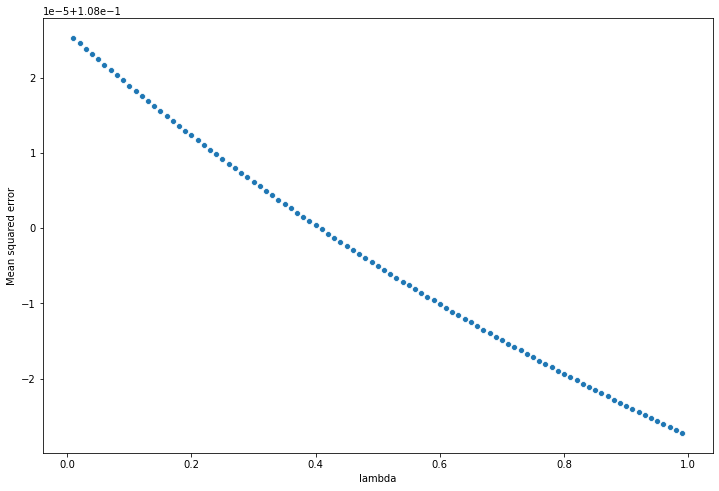

In [6]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x = lambdaSet, y = mseCV.mean(axis = 1))
plt.xlabel("lambda")
plt.ylabel("Mean squared error")

In [7]:
mseCV.mean(axis = 1)

array([0.10802532, 0.10802459, 0.10802387, 0.10802315, 0.10802244,
       0.10802173, 0.10802103, 0.10802033, 0.10801964, 0.10801895,
       0.10801827, 0.10801759, 0.10801691, 0.10801625, 0.10801558,
       0.10801492, 0.10801427, 0.10801362, 0.10801297, 0.10801233,
       0.1080117 , 0.10801106, 0.10801044, 0.10800981, 0.10800919,
       0.10800858, 0.10800797, 0.10800736, 0.10800676, 0.10800616,
       0.10800556, 0.10800497, 0.10800439, 0.1080038 , 0.10800322,
       0.10800265, 0.10800208, 0.10800151, 0.10800094, 0.10800038,
       0.10799983, 0.10799927, 0.10799873, 0.10799818, 0.10799764,
       0.1079971 , 0.10799656, 0.10799603, 0.1079955 , 0.10799498,
       0.10799445, 0.10799393, 0.10799342, 0.10799291, 0.1079924 ,
       0.10799189, 0.10799139, 0.10799089, 0.10799039, 0.1079899 ,
       0.10798941, 0.10798892, 0.10798844, 0.10798795, 0.10798748,
       0.107987  , 0.10798653, 0.10798606, 0.10798559, 0.10798512,
       0.10798466, 0.1079842 , 0.10798375, 0.10798329, 0.10798

In [8]:
best_lambda = lambdaSet[np.argmin(mseCV.mean(axis = 1))]
print(best_lambda)

0.99


In [9]:
# use the best lambda to fit the model 
ridge_mod = Ridge(alpha = best_lambda, random_state = seed, max_iter = 100000)
ridge_mod.fit(house_training_X_scaled, house_training_y)


print("The coefficient of Ridge Regression model is: \n",ridge_mod.coef_)
print("\nThe intercept of Ridge Regression model is: \n",ridge_mod.intercept_)


# predict with test scaled data
y_pred = ridge_mod.predict(house_test_X_scaled)
ridge_mse = mean_squared_error(house_test_y, y_pred)
print("\nMSE for Ridge regression:\n", ridge_mse)

The coefficient of Ridge Regression model is: 
 [ 0.07743654  0.22236942  0.08813018  0.17357346  0.03461682  0.0703567
 -0.06158731  0.14515655  0.2068222   0.2055728   0.14026589 -0.01487934
 -0.00602113 -0.07672184  0.03264303  0.01350715  0.02923133  0.058888
  0.02421958  0.01435394  0.00788125 -0.01862636 -0.01573002 -0.02198988
  0.02372701 -0.01037397 -0.01622244  0.04680023 -0.00376536 -0.01138729
  0.00890342 -0.01702573 -0.03136246 -0.03006152  0.05742388 -0.02125253
  0.10564208 -0.04236757 -0.02158127 -0.00293714 -0.0136211  -0.03319476
  0.02384201  0.05473929  0.00090424 -0.00246912  0.03666716]

The intercept of Ridge Regression model is: 
 -0.008809501400982812

MSE for Ridge regression:
 0.14671762861840748


(c) Fit a Lasso, where the tuning parameter λ should be found by cross-validation over a range of λ=seq(0,0.99,0.01).

In [10]:
seed = 2002094


from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error


lambdaSet = np.arange(0.01, 1, 0.01) 
# prof, for the part, i start from 0.01 becasue lamdba =0 will give an error in python. 
#lamdba = 0 is equivalent to no regularization

mseCV = np.zeros((len(lambdaSet), 5))


kf = KFold(5, random_state=seed, shuffle=True)
kf.get_n_splits(house_training_X)


f = 0
for train_idx, test_idx in kf.split(house_training_X):
    # spliting of data
    pseudo_train_X, pseudo_train_y = house_training_X.loc[train_idx,:], house_training_y[train_idx]
    pseudo_test_X, pseudo_test_y = house_training_X.loc[test_idx,:], house_training_y[test_idx]
    
    
    # scaling of data after splitting
    scaler = StandardScaler()
    scaler.fit(pseudo_train_X)
    pseudo_train_X_scaled = scaler.transform(pseudo_train_X)
    pseudo_train_X_scaled = pd.DataFrame(pseudo_train_X_scaled, columns=pseudo_train_X.columns)
    
    pseudo_test_X_scaled= scaler.transform(pseudo_test_X)
    pseudo_test_X_scaled = pd.DataFrame(pseudo_test_X, columns=pseudo_test_X.columns)
    
    
    for nn, lambda_ in enumerate(lambdaSet):
        lasso_mod = Lasso(alpha = lambda_, random_state = seed, max_iter = 100000)
        lasso_mod.fit(pseudo_train_X_scaled, pseudo_train_y)
        y_pred = lasso_mod.predict(pseudo_test_X_scaled)
        mseCV[nn, f] = mean_squared_error(pseudo_test_y, y_pred)
    
    f += 1

Text(0, 0.5, 'log Mean squared error')

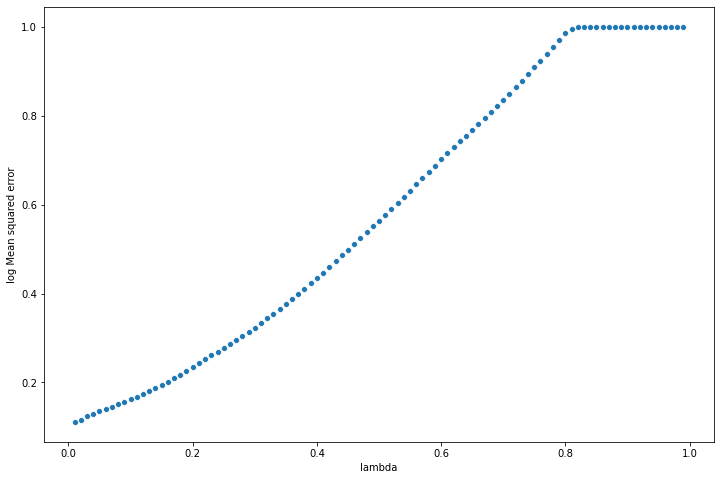

In [11]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x = lambdaSet, y = mseCV.mean(axis = 1))
plt.xlabel("lambda")
plt.ylabel("log Mean squared error")

In [12]:
mseCV.mean(axis = 1)

array([0.11076763, 0.11626815, 0.1233704 , 0.1299357 , 0.13570223,
       0.14084335, 0.14560787, 0.15053894, 0.15590359, 0.16173979,
       0.16757031, 0.17375633, 0.18031954, 0.18716641, 0.19426221,
       0.20155331, 0.20917264, 0.21704226, 0.22533064, 0.23392408,
       0.24273962, 0.25169019, 0.26052651, 0.26934795, 0.2779543 ,
       0.28654198, 0.29539621, 0.30444139, 0.31381709, 0.32352268,
       0.33355514, 0.34391111, 0.3545958 , 0.36557061, 0.37671768,
       0.3879961 , 0.3994399 , 0.41102323, 0.42281043, 0.43482665,
       0.44708559, 0.45963573, 0.47248648, 0.48563905, 0.49895029,
       0.51214875, 0.52564328, 0.5388508 , 0.55128299, 0.56397122,
       0.57691617, 0.59011484, 0.60356922, 0.61727916, 0.63124527,
       0.64546681, 0.65994316, 0.67399297, 0.68806388, 0.70237264,
       0.71612756, 0.72953465, 0.74246986, 0.75523017, 0.76819249,
       0.78135683, 0.79472317, 0.80829153, 0.8220619 , 0.83603427,
       0.85020866, 0.86458506, 0.87916348, 0.8939439 , 0.90892

In [13]:
best_lambda = lambdaSet[np.argmin(mseCV.mean(axis = 1))]
print(best_lambda)

0.01


In [14]:
# use the best lambda to fit the model 
lasso_mod = Lasso(alpha = best_lambda, random_state = seed, max_iter = 100000)
lasso_mod.fit(house_training_X_scaled, house_training_y)


print("The coefficient of Lasso Regression model is: \n",lasso_mod.coef_)
print("\nThe intercept of Lasso Regression model is: \n",lasso_mod.intercept_)


# predict with test scaled data
y_pred = lasso_mod.predict(house_test_X_scaled)
lasso_mse = mean_squared_error(house_test_y, y_pred)
print("\nMSE for Lasso regression:\n", lasso_mse)

The coefficient of Lasso Regression model is: 
 [ 7.43661303e-02  2.46710292e-01  6.50889887e-02  1.26727893e-01
  4.18980997e-02  1.25967235e-01 -0.00000000e+00  8.60356003e-02
  4.01308377e-02  0.00000000e+00  3.54332362e-01  0.00000000e+00
  0.00000000e+00 -4.94127590e-02  0.00000000e+00  1.53110672e-02
  2.65824510e-02  6.41416669e-02  1.90198929e-02  8.99654509e-03
  0.00000000e+00 -3.38831957e-03 -1.79204852e-03 -7.13271180e-03
  1.79842044e-02 -0.00000000e+00  0.00000000e+00  4.47406162e-02
  0.00000000e+00  0.00000000e+00  9.86238385e-05 -0.00000000e+00
 -9.68983899e-03 -5.27878839e-03  5.94404664e-02 -8.57314302e-03
  1.09340018e-01 -2.11691604e-02 -8.91215601e-03 -0.00000000e+00
  0.00000000e+00 -9.96721345e-03  2.54869868e-02  5.17228142e-02
  1.43368606e-03  0.00000000e+00  3.71666335e-02]

The intercept of Lasso Regression model is: 
 -0.008809501400982824

MSE for Lasso regression:
 0.14816570072844681


In [15]:
list1 = ["Linear Regression", "Ridge Regression", "Lasso Regreesion"]
list2= [linear_reg_mse,ridge_mse,lasso_mse]
house_summary_df = pd.DataFrame(list(zip(list1, list2)), columns=["Model", "Mean Squared Error"])
house_summary_df

,Model,Mean Squared Error
0,Linear Regression,0.146860
1,Ridge Regression,0.146718
2,Lasso Regreesion,0.148166


All the model are very close. the best model is Ridge Regression. If there is more data, we can get a larger spread of MSE, which could improve ranking.

5. In this question, we aim to predict whether a given car gets high or low gas mileage (mpg) based on the Auto data set. Training and test datasets are attached with this assignment. The variables cylinders and origin should be treated as categorical variables. For each method in the following parts, fit with the training data and evaluate it with the test data. Moreover, compute the confusion matrix and the overall fraction of correct predictions for the test data. Set seed as your matric number before you run program for each part.

In [16]:
import pandas as pd
auto_training = pd.read_csv("Auto.train.csv")
print(auto_training.shape)

(353, 8)


In [17]:
auto_test = pd.read_csv("Auto.test.csv")
print(auto_test.shape)

(39, 8)


In [18]:
# converting cylinder and origin to one hot one-hot numeric data
auto_training = pd.get_dummies(auto_training, columns=['cylinders', 'origin'])

auto_test = pd.get_dummies(auto_test, columns=['cylinders', 'origin'])
auto_test.insert(6, "cylinders_3", [0] * len(auto_test), True)

In [19]:
print(auto_test.columns)
print(auto_training.columns)

Index(['mpg', 'displacement', 'horsepower', 'weight', 'acceleration', 'year',
       'cylinders_3', 'cylinders_4', 'cylinders_5', 'cylinders_6',
       'cylinders_8', 'origin_1', 'origin_2', 'origin_3'],
      dtype='object')
Index(['mpg', 'displacement', 'horsepower', 'weight', 'acceleration', 'year',
       'cylinders_3', 'cylinders_4', 'cylinders_5', 'cylinders_6',
       'cylinders_8', 'origin_1', 'origin_2', 'origin_3'],
      dtype='object')


In [20]:
len(auto_test)

39

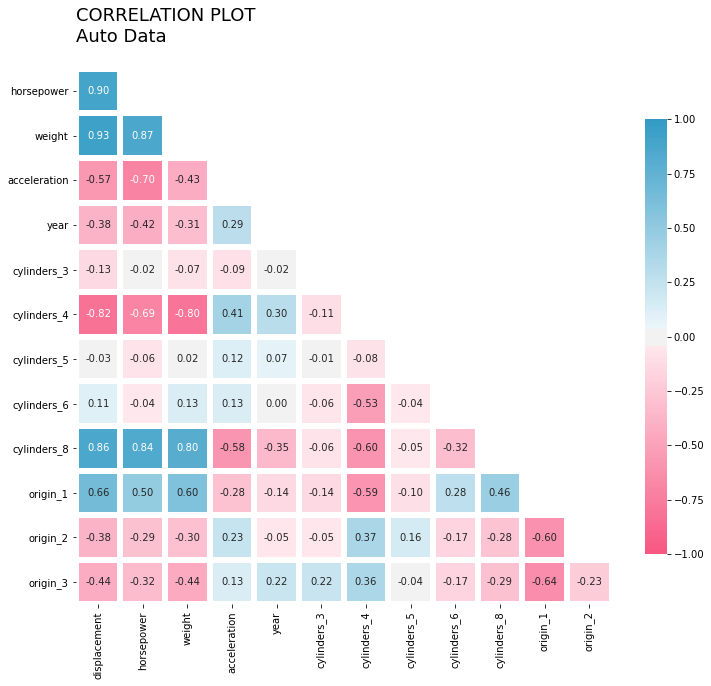

In [21]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#calculating of correlation
df_corr = auto_training.corr()
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))


# ploting of correlation matrix
fig, ax = plt.subplots(figsize=(12, 10))


# adjust mask and df
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()


# color map
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)


# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap=cmap, linewidths=5, vmin=-1, vmax=1, cbar_kws={"shrink": .8}, square=True)


# yticks
plt.yticks(rotation=0)


# title
title = 'CORRELATION PLOT\nAuto Data\n'
plt.title(title, loc='left', fontsize=18)


plt.show()

(a) Fit a logistic regression.

In [22]:
seed = 2002094


# splitting of data into X and y
auto_training_X = auto_training.iloc[:,1:]
auto_training_y = auto_training.iloc[:,0]

auto_test_X = auto_test.iloc[:,1:]
auto_test_y = auto_test.iloc[:,0]


# scaling of data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(auto_training_X)

auto_training_X_scaled = scaler.transform(auto_training_X)
auto_training_X_scaled = pd.DataFrame(auto_training_X_scaled, columns=auto_training_X.columns)

auto_test_X_scaled = scaler.transform(auto_test_X)
auto_test_X_scaled = pd.DataFrame(auto_test_X_scaled, columns=auto_test_X.columns)


#logistic regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=seed)
log_reg.fit(auto_training_X_scaled, auto_training_y)



print("The coefficient of Ridge Regression model is: \n",log_reg.coef_)
print("\nThe intercept of Ridge Regression model is: \n",log_reg.intercept_)


# predict with test scaled data
y_pred = log_reg.predict(auto_test_X_scaled)


# misclassification error
miss_err_log_reg = (y_pred != auto_test_y).mean()
print("\nThe misclassification error: ",miss_err_log_reg)


#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(auto_test_y, y_pred)
print("\nThe confusion matrix:\n",cm)

tn, fp, fn, tp = cm.ravel()
print("\nTrue negative:  ",tn)
print("False positive: ",fp)
print("False negative: ",fn)
print("True positive:  ",tp)

The coefficient of Ridge Regression model is: 
 [[ 0.50167148  1.41030528  2.26396022  0.31875594 -1.44823114  0.3757269
  -0.22717851 -0.29222753  0.53721309 -0.28528816  0.17975352 -0.0798857
  -0.14277035]]

The intercept of Ridge Regression model is: 
 [0.56723073]

The misclassification error:  0.10256410256410256

The confusion matrix:
 [[21  1]
 [ 3 14]]

True negative:   21
False positive:  1
False negative:  3
True positive:   14


(b) Fit a tree with pruning.

In [23]:
import pandas as pd
auto_training = pd.read_csv("Auto.train.csv")
print(auto_training.shape)

(353, 8)


In [24]:
auto_test = pd.read_csv("Auto.test.csv")
print(auto_test.shape)

(39, 8)


[Text(757.1546052631579, 784.0384615384615, 'displacement <= 190.5\ngini = 0.5\nsamples = 100.0%\nvalue = [0.493, 0.507]'),
 Text(339.5723684210526, 721.3153846153846, 'horsepower <= 84.5\ngini = 0.244\nsamples = 55.8%\nvalue = [0.858, 0.142]'),
 Text(97.89473684210526, 658.5923076923077, 'displacement <= 137.5\ngini = 0.034\nsamples = 32.6%\nvalue = [0.983, 0.017]'),
 Text(48.94736842105263, 595.8692307692307, 'gini = 0.0\nsamples = 29.5%\nvalue = [1.0, 0.0]'),
 Text(146.8421052631579, 595.8692307692307, 'year <= 73.5\ngini = 0.298\nsamples = 3.1%\nvalue = [0.818, 0.182]'),
 Text(97.89473684210526, 533.1461538461538, 'gini = 0.0\nsamples = 0.6%\nvalue = [0.0, 1.0]'),
 Text(195.78947368421052, 533.1461538461538, 'gini = 0.0\nsamples = 2.5%\nvalue = [1.0, 0.0]'),
 Text(581.25, 658.5923076923077, 'year <= 78.5\ngini = 0.433\nsamples = 23.2%\nvalue = [0.683, 0.317]'),
 Text(403.8157894736842, 595.8692307692307, 'weight <= 2775.0\ngini = 0.498\nsamples = 15.0%\nvalue = [0.528, 0.472]'),
 T

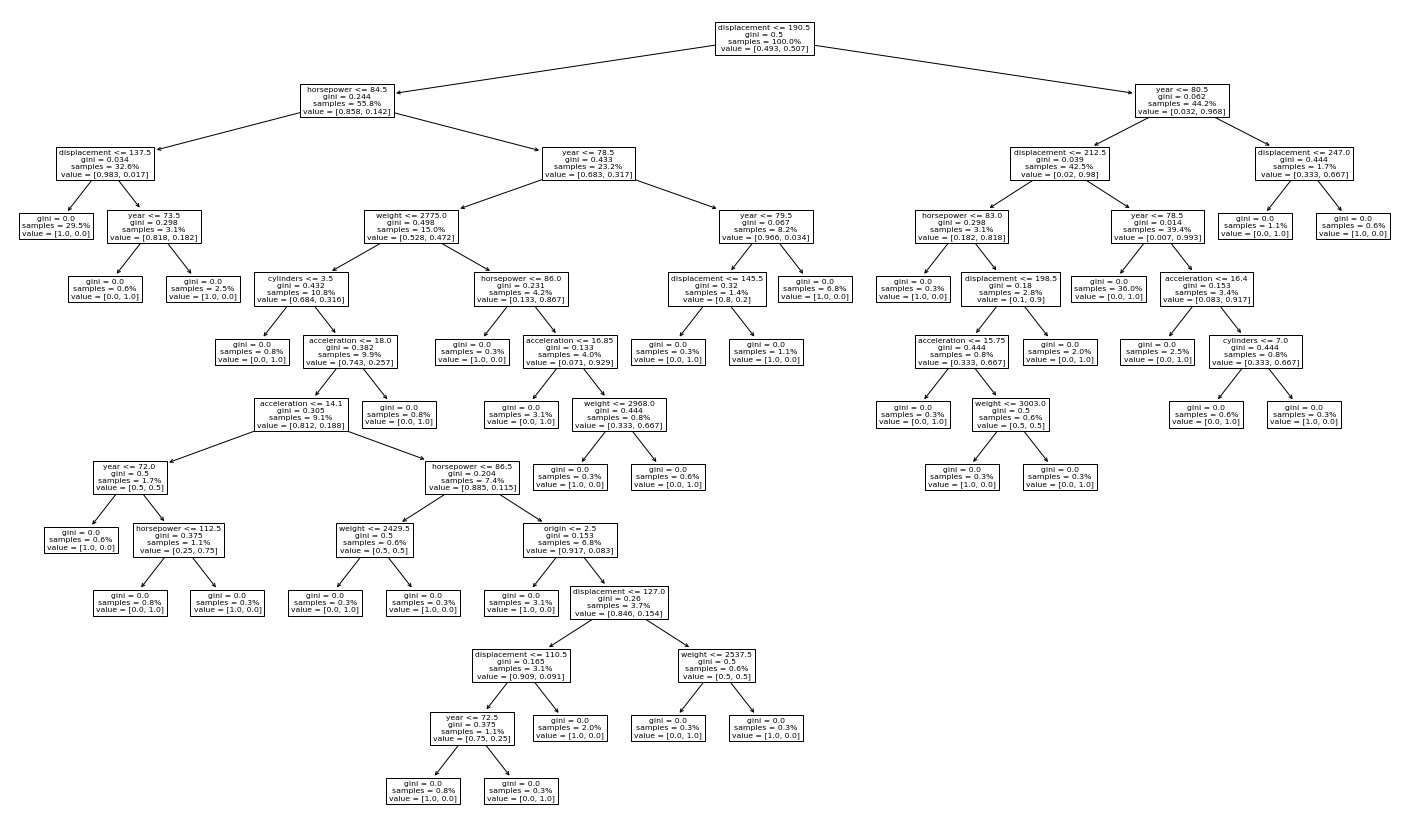

In [25]:
seed = 2002094


# splitting of data into X and y
auto_training_X = auto_training.iloc[:,1:]
auto_training_y = auto_training.iloc[:,0]

auto_test_X = auto_test.iloc[:,1:]
auto_test_y = auto_test.iloc[:,0]


# Classification tree
from sklearn.tree import DecisionTreeClassifier
tree_class = DecisionTreeClassifier(random_state = seed)

tree_class.fit(auto_training_X, auto_training_y)
y_pred = tree_class.predict(auto_test_X)


# plot tree
from sklearn.tree import plot_tree
features = auto_training_X.columns
plt.figure(figsize = (25,15))
plot_tree(tree_class, feature_names = features, proportion = True)

In [26]:
# misclassification error
miss_err_tree_class = (y_pred != auto_test_y).mean()
print("\nThe misclassification error: ",miss_err_tree_class)


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(auto_test_y, y_pred)
print("\nThe confusion matrix:\n",cm)

tn, fp, fn, tp = cm.ravel()
print("\nTrue negative:  ",tn)
print("False positive: ",fp)
print("False negative: ",fn)
print("True positive:  ",tp)


The misclassification error:  0.10256410256410256

The confusion matrix:
 [[19  3]
 [ 1 16]]

True negative:   19
False positive:  3
False negative:  1
True positive:   16


Cross-validation to prun the tree

In [27]:
seed = 2002094
from sklearn.model_selection import KFold


n_folds = 10
kf = KFold(n_folds, random_state = seed, shuffle = True)
kf.get_n_splits(auto_training_X)


# Cross validation
terminal_nodes = [1,2,5,7,8,10,13,16,18]
n_nodes = len(terminal_nodes)
ErrCV = np.zeros((n_nodes, n_folds))
f = 0


for train_idx, test_idx in kf.split(auto_training_X):
    # spliting of data
    pseudo_train_X, pseudo_train_y = auto_training_X.loc[train_idx,:], auto_training_y[train_idx]
    pseudo_test_X, pseudo_test_y = auto_training_X.loc[test_idx,:], auto_training_y[test_idx]
    
    
    for nn, node in enumerate(terminal_nodes):
        try:
            tree_class = DecisionTreeClassifier(random_state = nn, max_leaf_nodes = node)
            tree_class.fit(pseudo_train_X, pseudo_train_y)
            y_pred = tree_class.predict(pseudo_test_X)
            ErrCV[nn, f] = (y_pred != pseudo_test_y).mean()
        except:
            ErrCV[nn, f] = 1
    f += 1

    
ErrCV = ErrCV.mean(axis = 1)

Text(0, 0.5, 'Misclassification error')

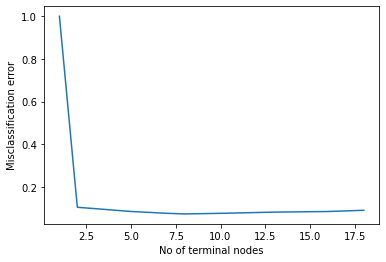

In [28]:
# Plot average CV error
sns.lineplot(x = terminal_nodes, y = ErrCV)
plt.xlabel("No of terminal nodes")
plt.ylabel("Misclassification error")

In [29]:
idx = np.argmin(ErrCV)
max_nodes = terminal_nodes[idx]
print("The best max nodes:", max_nodes)

The best max nodes: 8


Prunned Classification tree

[Text(697.5, 757.1571428571428, 'displacement <= 190.5\ngini = 0.5\nsamples = 100.0%\nvalue = [0.493, 0.507]'),
 Text(558.0, 640.6714285714286, 'horsepower <= 84.5\ngini = 0.244\nsamples = 55.8%\nvalue = [0.858, 0.142]'),
 Text(418.5, 524.1857142857143, 'gini = 0.034\nsamples = 32.6%\nvalue = [0.983, 0.017]'),
 Text(697.5, 524.1857142857143, 'year <= 78.5\ngini = 0.433\nsamples = 23.2%\nvalue = [0.683, 0.317]'),
 Text(558.0, 407.7, 'weight <= 2775.0\ngini = 0.498\nsamples = 15.0%\nvalue = [0.528, 0.472]'),
 Text(279.0, 291.21428571428567, 'cylinders <= 3.5\ngini = 0.432\nsamples = 10.8%\nvalue = [0.684, 0.316]'),
 Text(139.5, 174.7285714285714, 'gini = 0.0\nsamples = 0.8%\nvalue = [0.0, 1.0]'),
 Text(418.5, 174.7285714285714, 'acceleration <= 18.0\ngini = 0.382\nsamples = 9.9%\nvalue = [0.743, 0.257]'),
 Text(279.0, 58.24285714285713, 'gini = 0.305\nsamples = 9.1%\nvalue = [0.812, 0.188]'),
 Text(558.0, 58.24285714285713, 'gini = 0.0\nsamples = 0.8%\nvalue = [0.0, 1.0]'),
 Text(837.0, 

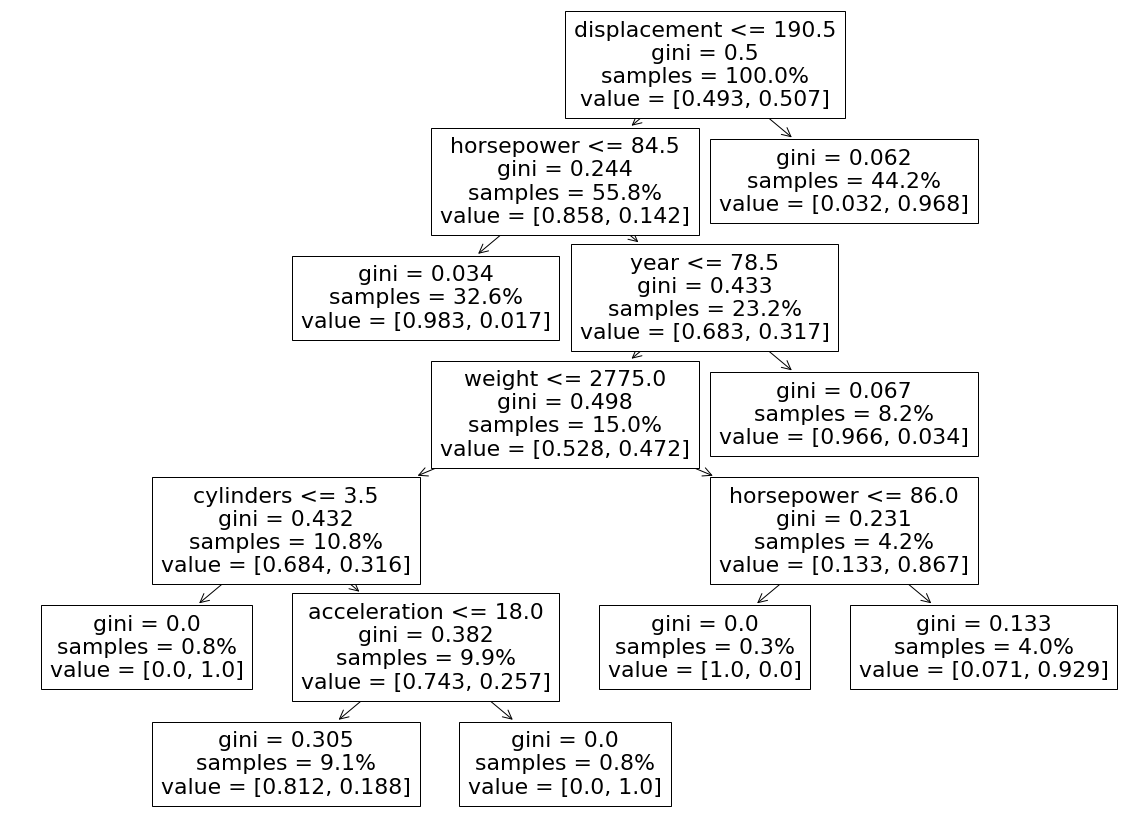

In [30]:
prune_tree_class = DecisionTreeClassifier(random_state = seed, max_leaf_nodes = max_nodes)
prune_tree_class.fit(auto_training_X, auto_training_y)
y_pred = prune_tree_class.predict(auto_test_X)


# plot tree
from sklearn.tree import plot_tree
features = auto_training_X.columns
plt.figure(figsize = (20,15))
plot_tree(prune_tree_class, feature_names = features, proportion = True)

In [31]:
# misclassification error
miss_err_tree_class_prune = (y_pred != auto_test_y).mean()
print("\nThe misclassification error: ",miss_err_tree_class_prune)


#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(auto_test_y, y_pred)
print("\nThe confusion matrix:\n",cm)

tn, fp, fn, tp = cm.ravel()
print("\nTrue negative:  ",tn)
print("False positive: ",fp)
print("False negative: ",fn)
print("True positive:  ",tp)


The misclassification error:  0.07692307692307693

The confusion matrix:
 [[21  1]
 [ 2 15]]

True negative:   21
False positive:  1
False negative:  2
True positive:   15


In [32]:
print("After prunning the missclassication error reduce by:", miss_err_tree_class-miss_err_tree_class_prune)

After prunning the missclassication error reduce by: 0.025641025641025633


(c) Apply random forests with 500 bootstrapped trees and m = √p, where p is the number of predictors.

In [33]:
auto_training = pd.read_csv("Auto.train.csv")
auto_test = pd.read_csv("Auto.test.csv")
auto_training_X = auto_training.iloc[:,1:]
auto_training_y = auto_training.iloc[:,0]

auto_test_X = auto_test.iloc[:,1:]
auto_test_y = auto_test.iloc[:,0]

In [34]:
seed = 2002094


#randomforest
from sklearn.ensemble import RandomForestClassifier
rf_class = RandomForestClassifier(max_features = "sqrt", n_estimators = 500, random_state = seed, oob_score = True)
rf_class.fit(auto_training_X, auto_training_y)
y_pred = rf_class.predict(auto_training_X)


# out of bag error
print("OOB estimate of  error rate: {:.2%}".format(1-rf_class.oob_score_))


# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(auto_training_y, y_pred)
print("\nThe confusion in-sample matrix:\n",cm)

tn, fp, fn, tp = cm.ravel()
print("\nTrue negative:  ",tn)
print("False positive: ",fp)
print("False negative: ",fn)
print("True positive:  ",tp)

OOB estimate of  error rate: 6.52%

The confusion in-sample matrix:
 [[174   0]
 [  0 179]]

True negative:   174
False positive:  0
False negative:  0
True positive:   179


Text(0.5, 0, 'Gini importance')

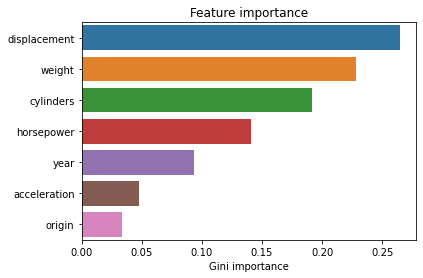

In [35]:
features = auto_training_X.columns
importances = rf_class.feature_importances_
idx = np.argsort(importances)[::-1]

sns.barplot(x = importances[idx], y = features[idx])
plt.title("Feature importance")
plt.xlabel("Gini importance")

In [36]:
y_pred = rf_class.predict(auto_test_X)

# misclassification error
miss_err_tree_rf = (y_pred != auto_test_y).mean()
print("\nThe misclassification error: ",miss_err_tree_rf)

# confusion matrix
cm = confusion_matrix(auto_test_y, y_pred)
print("\nThe confusion matrix:\n",cm)

tn, fp, fn, tp = cm.ravel()
print("\nTrue negative:  ",tn)
print("False positive: ",fp)
print("False negative: ",fn)
print("True positive:  ",tp)


The misclassification error:  0.10256410256410256

The confusion matrix:
 [[20  2]
 [ 2 15]]

True negative:   20
False positive:  2
False negative:  2
True positive:   15


(d) Apply one boosting approach (AdaBoost, XGBoost, etc.) with 500 tress (while other parameters could be self-specified or by default).

Gradient Boosting

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
class_boost = GradientBoostingClassifier(n_estimators = 500, random_state = seed, max_features = "sqrt")
class_boost.fit(auto_training_X, auto_training_y)
y_pred = class_boost.predict(auto_training_X)


# confusion matrix
cm = confusion_matrix(auto_training_y, y_pred)
print("\nThe in-sample confusion matrix:\n",cm)

tn, fp, fn, tp = cm.ravel()
print("\nTrue negative:  ",tn)
print("False positive: ",fp)
print("False negative: ",fn)
print("True positive:  ",tp)


The in-sample confusion matrix:
 [[174   0]
 [  0 179]]

True negative:   174
False positive:  0
False negative:  0
True positive:   179


Text(0.5, 0, 'Gini importance')

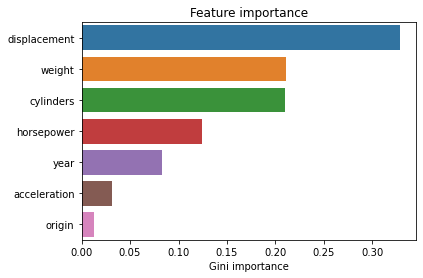

In [38]:
features = auto_training_X.columns
importances = class_boost.feature_importances_
idx = np.argsort(importances)[::-1]

sns.barplot(x = importances[idx], y = features[idx])
plt.title("Feature importance")
plt.xlabel("Gini importance")

In [39]:
y_pred = class_boost.predict(auto_test_X)

# misclassification error
miss_err_class_boost = (y_pred != auto_test_y).mean()
print("\nThe misclassification error: ",miss_err_class_boost)

# confusion matrix
cm = confusion_matrix(auto_test_y, y_pred)
print("\nThe confusion matrix:\n",cm)

tn, fp, fn, tp = cm.ravel()
print("\nTrue negative:  ",tn)
print("False positive: ",fp)
print("False negative: ",fn)
print("True positive:  ",tp)


The misclassification error:  0.10256410256410256

The confusion matrix:
 [[20  2]
 [ 2 15]]

True negative:   20
False positive:  2
False negative:  2
True positive:   15


Adaboost

In [40]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
base_estimator = DecisionTreeClassifier(max_depth=8)
ada_cls = AdaBoostClassifier(base_estimator, n_estimators = 500, random_state = seed)

ada_cls.fit(auto_training_X, auto_training_y)
y_pred = ada_cls.predict(auto_training_X)


# confusion matrix
cm = confusion_matrix(auto_training_y, y_pred)
print("\nThe confusion in-sample matrix:\n",cm)

tn, fp, fn, tp = cm.ravel()
print("\nTrue negative:  ",tn)
print("False positive: ",fp)
print("False negative: ",fn)
print("True positive:  ",tp)


The confusion in-sample matrix:
 [[174   0]
 [  0 179]]

True negative:   174
False positive:  0
False negative:  0
True positive:   179


Text(0.5, 0, 'Gini importance')

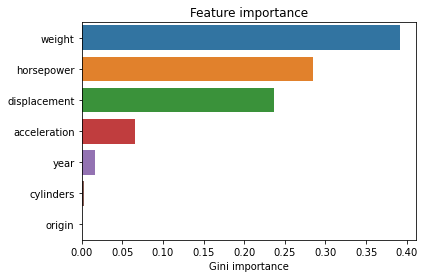

In [41]:
features = auto_training_X.columns
importances = ada_cls.feature_importances_
idx = np.argsort(importances)[::-1]

sns.barplot(x = importances[idx], y = features[idx])
plt.title("Feature importance")
plt.xlabel("Gini importance")

In [42]:
y_pred = ada_cls.predict(auto_test_X)

# misclassification error
miss_err_ada_cls = (y_pred != auto_test_y).mean()
print("\nThe misclassification error: ",miss_err_ada_cls)

# confusion matrix
cm = confusion_matrix(auto_test_y, y_pred)
print("\nThe confusion matrix:\n",cm)

tn, fp, fn, tp = cm.ravel()
print("\nTrue negative:  ",tn)
print("False positive: ",fp)
print("False negative: ",fn)
print("True positive:  ",tp)


The misclassification error:  0.10256410256410256

The confusion matrix:
 [[20  2]
 [ 2 15]]

True negative:   20
False positive:  2
False negative:  2
True positive:   15


In [43]:
import xgboost as xgb
from xgboost import XGBClassifier

xgb_cls = XGBClassifier(max_depth = 8, random_state = seed, verbosity = 0, n_estimators =500)

xgb_cls.fit(auto_training_X, auto_training_y)
y_pred = xgb_cls.predict(auto_training_X)


# confusion matrix
cm = confusion_matrix(auto_training_y, y_pred)
print("\nThe in-sample confusion matrix:\n",cm)

tn, fp, fn, tp = cm.ravel()
print("\nTrue negative:  ",tn)
print("False positive: ",fp)
print("False negative: ",fn)
print("True positive:  ",tp)

C:\Users\tanya\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



The in-sample confusion matrix:
 [[174   0]
 [  0 179]]

True negative:   174
False positive:  0
False negative:  0
True positive:   179


Text(0.5, 0, 'Gini importance')

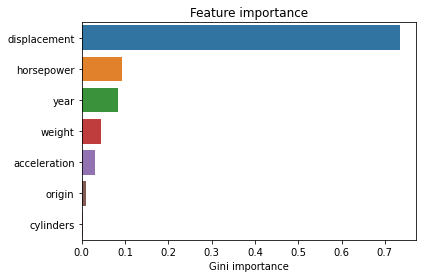

In [44]:
features = auto_training_X.columns
importances = xgb_cls.feature_importances_
idx = np.argsort(importances)[::-1]

sns.barplot(x = importances[idx], y = features[idx])
plt.title("Feature importance")
plt.xlabel("Gini importance")

In [45]:
y_pred = xgb_cls.predict(auto_test_X)

# misclassification error
miss_err_xgb_cls = (y_pred != auto_test_y).mean()
print("\nThe misclassification error: ",miss_err_xgb_cls)

# confusion matrix
cm = confusion_matrix(auto_test_y, y_pred)
print("\nThe confusion matrix:\n",cm)

tn, fp, fn, tp = cm.ravel()
print("\nTrue negative:  ",tn)
print("False positive: ",fp)
print("False negative: ",fn)
print("True positive:  ",tp)


The misclassification error:  0.07692307692307693

The confusion matrix:
 [[20  2]
 [ 1 16]]

True negative:   20
False positive:  2
False negative:  1
True positive:   16


In [46]:
model =["Logistic Regression","Classification Tree","Pruned Classification Tree", "RandomForest", "Gradient Boosting", "Adaboost", "XGboost"]
model_miss_error = [miss_err_log_reg, miss_err_tree_class, miss_err_tree_class_prune, miss_err_tree_rf, miss_err_class_boost, miss_err_ada_cls, miss_err_xgb_cls]
auto_summary_df = pd.DataFrame(list(zip(model, model_miss_error)), columns=["Model", "Misclassification Error"])
auto_summary_df

,Model,Misclassification Error
0,Logistic Regression,0.102564
1,Classification Tree,0.102564
2,Pruned Classification Tree,0.076923
3,RandomForest,0.102564
4,Gradient Boosting,0.102564
5,Adaboost,0.102564
6,XGboost,0.076923


From the table above, the best models are Rruned Classification Tree and XGboost base on misclassification error.
However, most of the models' misclassification error are quite close. This is becasue of the size of the data is small. To get a better result, increase the dataset.